In [1]:
from AutoML import AutoML

# Пример

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [3]:
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.Series(data['target'])

In [4]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Обучим модель

По сути, единственный параметр, который нужно задать, это task_type. Он может быть:
    * 'binary_classification' - бинарная классификация, по умолчанию
    * 'regression' - регрессия

In [5]:
clf = AutoML()

In [6]:
clf.fit(X, y)

# Проверим, насколько хорошо обучилась модель

Сюда можно подставить как данные, на которых модель обучалась, так и любые тестовые данные

In [7]:
clf.evaluate(X, y)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 10.29it/s]


,metric_name,metric_value
0,average_precision,0.995823
1,roc_auc_score,0.994702
2,precision@10%,1.000000
3,lift_top_1%,1.593838
4,lift_top_5%,1.593838
5,lift_top_10%,1.593838


# Выделим главные фичи для предсказаний

Важность фичей показывается в виде графика, а так же сохраняется в виде csv файла по пути /automl/train/features

Важный параметр n_features, указывает, сколько фичей рисовать на графике, по умолчанию 30

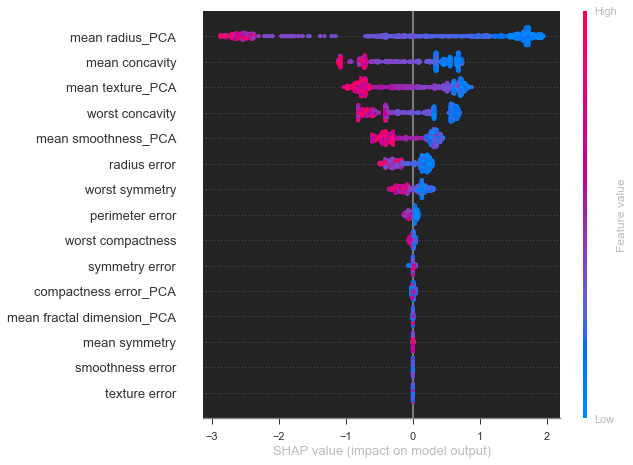

In [8]:
clf.explain_model()

# Сделаем предсказания

In [9]:
predictions = clf.predict(X)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 10.09it/s]


In [10]:
predictions[:10]

array([0.0330565 , 0.19754717, 0.01545859, 0.32586049, 0.04553069,
       0.49385563, 0.01081237, 0.11234681, 0.15193055, 0.21890223])

# Проверим, отличаются ли новые данные от исходных

In [11]:
clf.check_test_data(X)

Data seems to be OK


# Нарисуем precision recall кривую

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 10.83it/s]


Average precision-recall score: 1.00


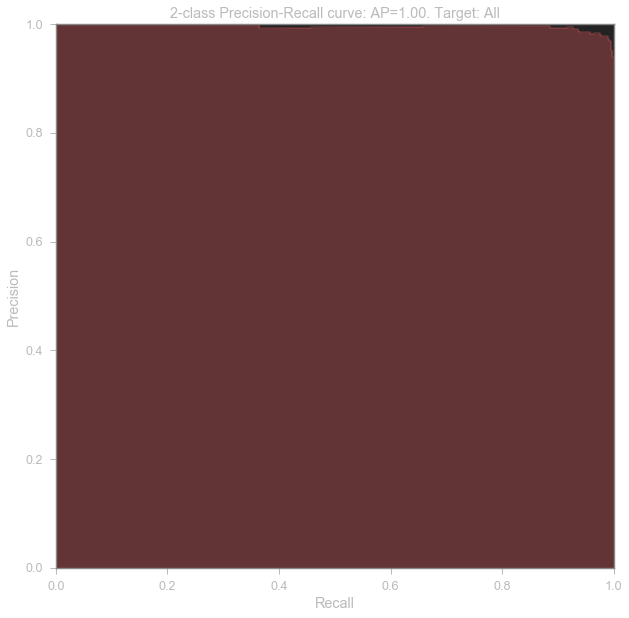

<Figure size 432x288 with 0 Axes>

In [12]:
clf.plot_PR_curve(X, y)

# Объясним единичное предсказание

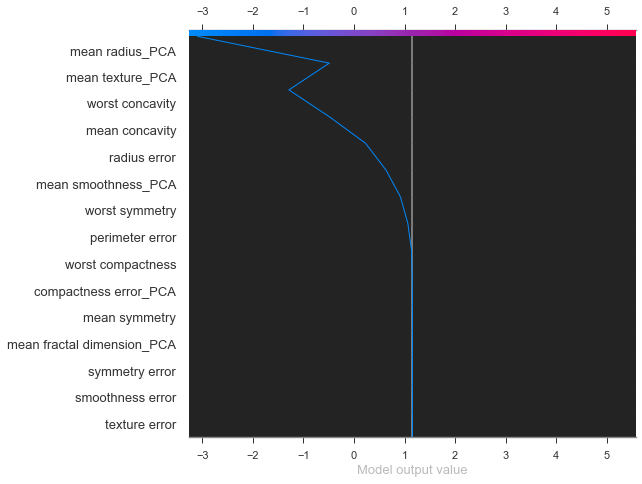

In [13]:
clf.explain_one_sample(X.head(1))

# Объясним произвольный сэмпл данных

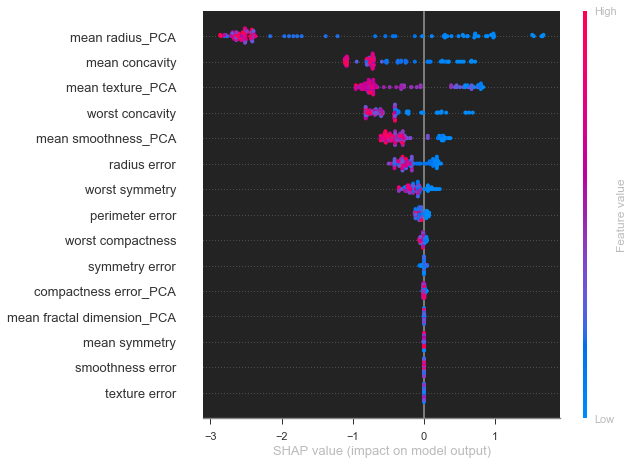

In [14]:
clf.explain_data(X.head(20))

# Сохраним модель

In [15]:
clf.save()

# Загрузим сохраненную модель

In [16]:
clf = AutoML().load('automl/model/20191024225730_model.pkl')

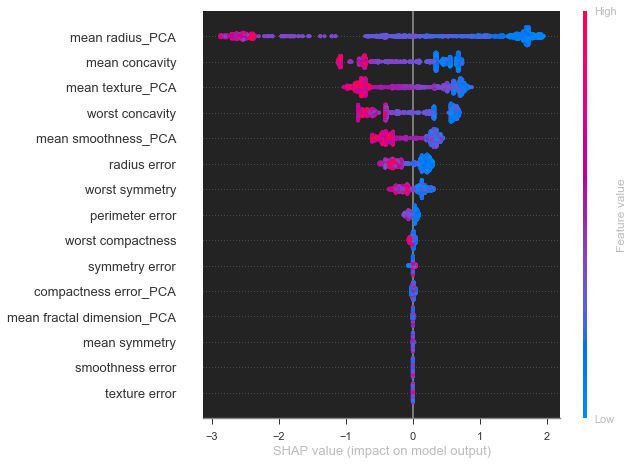

In [17]:
clf.explain_model()